# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('.../created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

## Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index(['pd qcut2', 'pd qcut1', 'pd qcut3'], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('.../var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [ ]:
# code along
df._get_numeric_data().corr().round(2)

,correlated w target 2,standard scaling,uniform corr 1,informative_1,outliers 1,correlated w target 1,min max scaling,target,multicollinearity 4,multicollinearity 2,multicollinearity 1,informative_2,corr_feature_class,uniform corr 2,duplicate_1,duplicate_2,outliers 2,multicollinearity 3,class
correlated w target 2,1.00,0.02,0.44,-0.02,0.02,0.40,0.01,0.69,0.04,0.00,-0.01,0.68,0.20,0.47,-0.02,0.68,-0.02,0.03,0.50
standard scaling,0.02,1.00,-0.01,0.04,0.00,0.02,-0.02,0.00,0.07,-0.03,-0.03,0.01,-0.06,0.02,0.04,0.01,-0.04,0.05,-0.04
uniform corr 1,0.44,-0.01,1.00,-0.07,-0.08,0.34,-0.05,0.69,-0.02,0.01,0.04,0.68,0.16,0.52,-0.07,0.68,-0.05,-0.03,0.54
informative_1,-0.02,0.04,-0.07,1.00,0.00,-0.02,0.03,-0.03,-0.04,-0.01,0.00,0.10,-0.02,-0.03,1.00,0.10,-0.03,0.00,-0.01
outliers 1,0.02,0.00,-0.08,0.00,1.00,0.03,0.01,-0.04,-0.02,-0.06,-0.07,-0.04,-0.03,-0.01,0.00,-0.04,-0.02,0.01,-0.04
correlated w target 1,0.40,0.02,0.34,-0.02,0.03,1.00,-0.05,0.53,-0.01,0.02,0.00,0.53,0.16,0.32,-0.02,0.53,0.02,-0.02,0.38
min max scaling,0.01,-0.02,-0.05,0.03,0.01,-0.05,1.00,-0.01,0.01,-0.02,-0.03,-0.01,0.04,-0.02,0.03,-0.01,-0.02,0.04,0.01
target,0.69,0.00,0.69,-0.03,-0.04,0.53,-0.01,1.00,0.03,0.02,0.02,0.99,0.28,0.70,-0.03,0.99,0.01,0.03,0.72
multicollinearity 4,0.04,0.07,-0.02,-0.04,-0.02,-0.01,0.01,0.03,1.00,0.04,-0.03,0.02,-0.04,0.03,-0.04,0.02,0.04,0.90,-0.01
multicollinearity 2,0.00,-0.03,0.01,-0.01,-0.06,0.02,-0.02,0.02,0.04,1.00,0.66,0.02,0.00,-0.01,-0.01,0.02,-0.01,0.03,-0.01


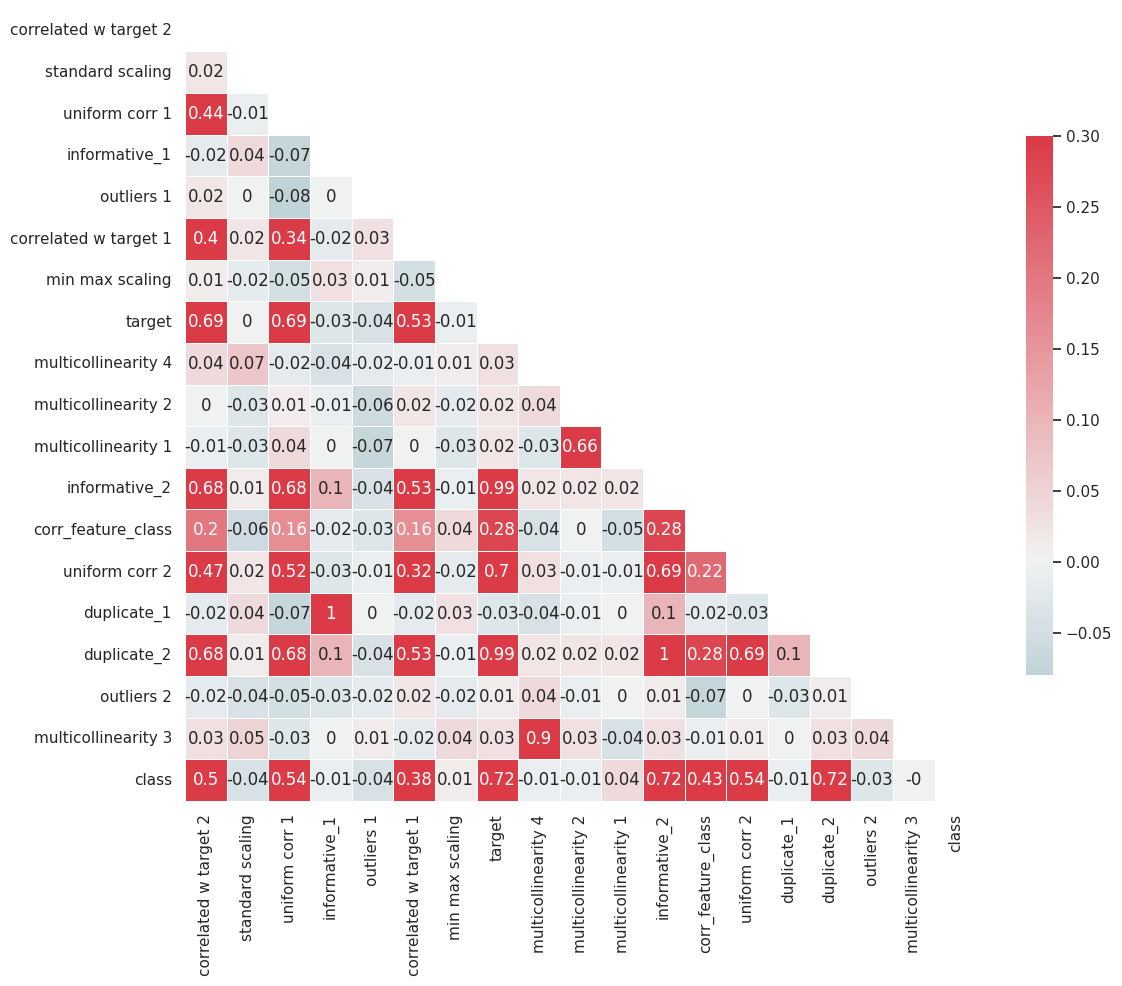

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('.../correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
71         informative_1          duplicate_1     1.000000
224        informative_2          duplicate_2     1.000000
269          duplicate_1        informative_1     1.000000
296          duplicate_2        informative_2     1.000000
144               target        informative_2     0.991500
148               target          duplicate_2     0.991500
216        informative_2               target     0.991500
292          duplicate_2               target     0.991500
169  multicollinearity 4  multicollinearity 3     0.904962
331  multicollinearity 3  multicollinearity 4     0.904962
151               target                class     0.722662
349                class               target     0.722662
227        informative_2                class     0.717481
303          duplicate_2                class     0.717481
353                class        informative_2     0.717481
357                class          duplicate_2     0.7174

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf
                 Variable           VIF
0   correlated w target 2  1.619675e+00
1        standard scaling  1.012457e+00
2          uniform corr 1  1.520865e+00
3           informative_1           inf
4              outliers 1  1.016685e+00
5   correlated w target 1  1.416212e+00
6         min max scaling  1.009409e+00
7                  target  1.168994e+04
8     multicollinearity 4  2.283353e+00
9     multicollinearity 2  1.430171e+00
10    multicollinearity 1  1.431819e+00
11          informative_2           inf
12     corr_feature_class  1.072633e+00
13         uniform corr 2  1.329686e+00
14            duplicate_1           inf
15            duplicate_2           inf
16             outliers 2  1.014183e+00
17    multicollinearity 3  2.280042e+00


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('.../vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_1 inf
informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


target 11689.943495054538
standard scaling 14.985640308984271
                 Variable       VIF
0   correlated w target 2  1.621038
1          uniform corr 1  6.464857
2              outliers 1  1.017558
3   correlated w target 1  1.412749
4         min max scaling  9.424784
5     multicollinearity 4  2.293390
6     multicollinearity 2  1.434687
7     multicollinearity 1  1.431587
8      corr_feature_class  1.660966
9          uniform corr 2  7.096115
10            duplicate_1  1.057868
11            duplicate_2  2.547101
12             outliers 2  2.583981
13    multicollinearity 3  2.284534


In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_1 inf
target 11689.943495054538


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


standard scaling 14.985640308984271


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_2 inf
                 Variable       VIF
0   correlated w target 2  1.621038
1          uniform corr 1  6.464857
2              outliers 1  1.017558
3   correlated w target 1  1.412749
4         min max scaling  9.424784
5     multicollinearity 4  2.293390
6     multicollinearity 2  1.434687
7     multicollinearity 1  1.431587
8      corr_feature_class  1.660966
9          uniform corr 2  7.096115
10            duplicate_1  1.057868
11            duplicate_2  2.547101
12             outliers 2  2.583981
13    multicollinearity 3  2.284534


In [ ]:
print(removed1)
print(removed2)

['informative_1', 'informative_2', 'target', 'standard scaling']
['informative_1', 'target', 'standard scaling', 'informative_2']


## Outliers

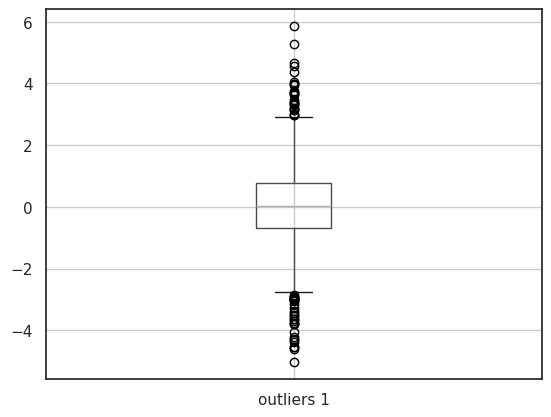

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,correlated w target 2,standard scaling,uniform corr 1,informative_1,outliers 1,correlated w target 1,min max scaling,target,multicollinearity 4,multicollinearity 2,multicollinearity 1,informative_2,corr_feature_class,uniform corr 2,duplicate_1,duplicate_2,outliers 2,multicollinearity 3,class
count,808.000000,1010.000000,706.000000,1010.000000,907.000000,1010.000000,909.000000,1010.000000,807.000000,960.000000,705.000000,1010.000000,707.000000,505.000000,1010.000000,1010.000000,1010.000000,908.000000,1010.000000
mean,0.095813,49976.747513,0.494449,-0.047372,0.049798,0.174808,422.422403,0.195609,-0.066657,-0.055818,0.011434,-0.018978,2.055578,0.489747,-0.047372,-0.018978,2.895015,-0.046892,0.502970
std,2.955398,10208.332456,0.288302,1.324010,1.346687,2.978709,100.182792,2.991347,1.007869,0.970038,1.001267,1.403413,3.233617,0.295246,1.324010,1.403413,2.196185,1.023693,0.500239
min,-8.161661,8175.893046,0.003231,-3.836929,-5.030864,-10.241793,9.271920,-8.943212,-2.954008,-3.088686,-2.809906,-4.543441,-12.790567,0.001699,-3.836929,-4.543441,-3.794006,-3.263191,0.000000
25%,-1.930904,43459.789290,0.244874,-1.018399,-0.680592,-1.941877,356.324631,-2.166961,-0.741500,-0.708669,-0.647445,-1.050339,0.177714,0.217855,-1.018399,-1.050339,1.407231,-0.701439,0.000000
50%,0.102482,49740.181469,0.484182,-0.224366,0.016721,0.120585,424.239276,-0.011259,-0.090804,-0.089010,-0.034434,-0.194004,2.001172,0.475996,-0.224366,-0.194004,2.932398,-0.001473,1.000000
75%,2.173246,57013.783873,0.745422,0.975364,0.759216,2.247761,488.055011,2.367192,0.642672,0.559828,0.656427,0.991017,3.800447,0.739002,0.975364,0.991017,4.281866,0.602101,1.000000
max,10.426718,85289.199605,0.998136,3.994644,5.863531,10.552818,723.573055,9.299296,3.267778,3.129346,2.993883,4.020262,18.965600,0.999146,3.994644,4.020262,10.657751,2.905544,1.000000


In [ ]:


# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('.../outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null   float64 
